In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
tab = pd.read_csv('clustering_R3.csv')
tab.describe()

,X1,X2,X3
count,1000.000000,1000.000000,1000.000000
mean,240.181036,154.937365,5.454947
std,115.556334,41.964161,4.793973
min,38.516347,87.376621,0.125057
25%,148.801776,104.853322,1.806255
50%,231.754437,151.846118,3.430892
75%,350.277958,198.367658,8.287805
max,399.930758,213.917568,24.537806


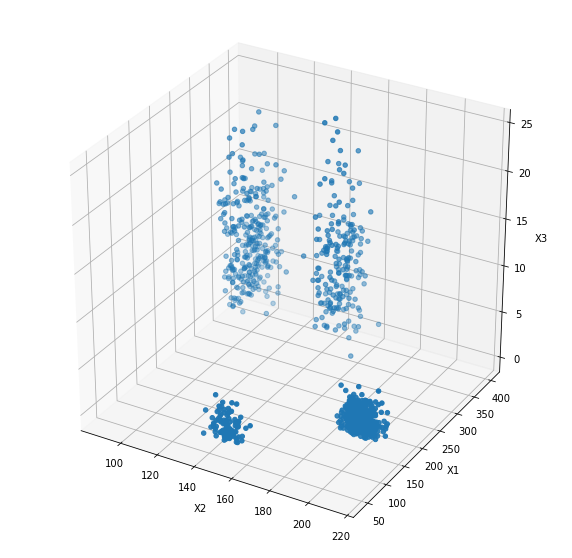

In [3]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(tab.X2,tab.X1,tab.X3)
ax.set_xlabel('X2')
ax.set_ylabel('X1')
ax.set_zlabel('X3')
plt.show(fig)

Intuicyjnie wydaje się, że zbiór jest podzielony na 4 klastry. Sprawdzam jednak jaka ilość klastrów (testuję od 2 do 10) uzyska najlepsze wartości metryk. Użyję algorytmów k-means i AgglomerativeClustering oraz metryk silhouette_score i davies_bouldin_score. Współczynnik Silhouette jest miarą tego, jak obserwacja jest podobna do klastra, do którego jest przypisana, w porównaniu do innych klastrów. W jego wypadku im wyższy wynik tym lepiej. Indeks Daviesa–Bouldina jest zdefiniowany jako średnia miara podobieństwa między klastrem a jego najbardziej podobnym klastrem. Im niższy wynik drugiegiej metryki tym lepiej.

## KMeans

### metryka - silhouette_score

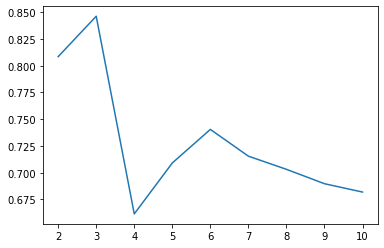

In [4]:
metric = []
for i in range(2,11):
    res = KMeans(n_clusters=i).fit_predict(tab)
    metric.append(silhouette_score(tab, res))

plt.plot(range(2,11),metric)
plt.show(fig)

### metryka - davies_bouldin_score

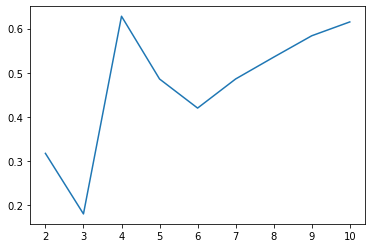

In [5]:
metric = []
for i in range(2,11):
    res = KMeans(n_clusters=i).fit_predict(tab)
    metric.append(davies_bouldin_score(tab, res))

plt.plot(range(2,11),metric)
plt.show(fig)

Obydwie metryki wskazują na najlepszą ilośc klastrów równą 3. Porównamy wizualizację takiego podziału z intuicyjną liczbą klastrów.

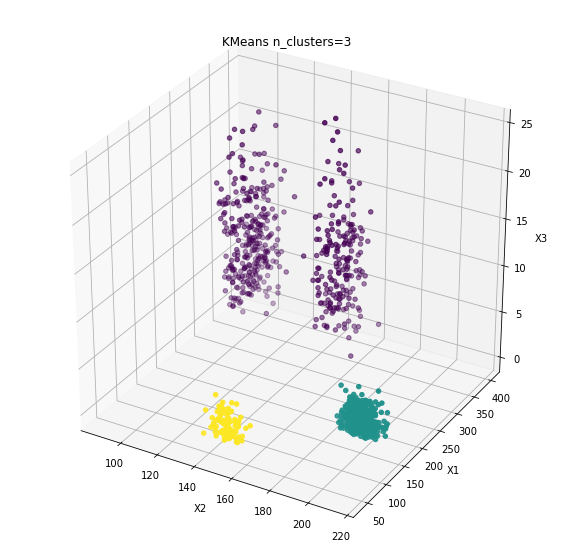

In [6]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(tab.X2,tab.X1,tab.X3,c=KMeans(n_clusters=3).fit_predict(tab))
ax.set_xlabel('X2')
ax.set_ylabel('X1')
ax.set_zlabel('X3')
ax.set_title('KMeans n_clusters=3')
plt.show(fig)

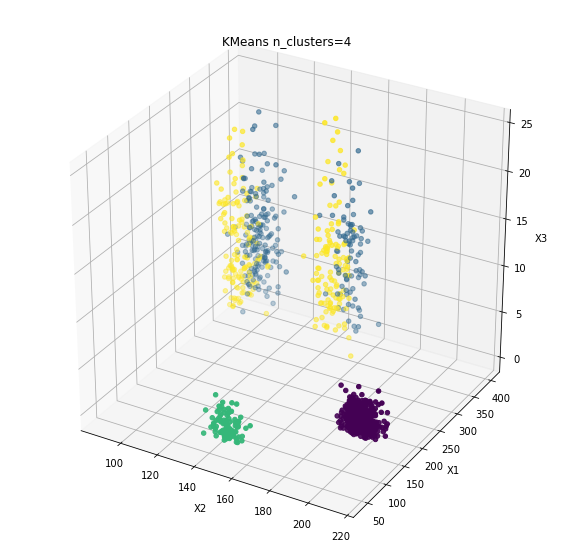

In [7]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(tab.X2,tab.X1,tab.X3,c=KMeans(n_clusters=4).fit_predict(tab))
ax.set_xlabel('X2')
ax.set_ylabel('X1')
ax.set_zlabel('X3')
ax.set_title('KMeans n_clusters=4')
plt.show(fig)

## AgglomerativeClustering

### metryka - silhouette_score

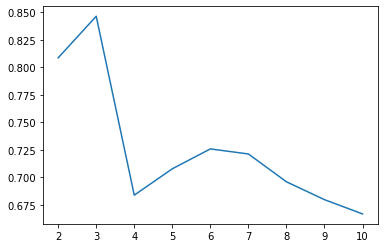

In [8]:
metric = []
for i in range(2,11):
    res = AgglomerativeClustering(n_clusters=i).fit_predict(tab)
    metric.append(silhouette_score(tab, res))

plt.plot(range(2,11),metric)
plt.show(fig)

### metryka - davies_bouldin_score

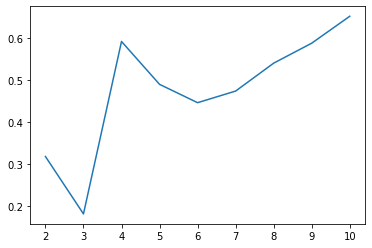

In [9]:
metric = []
for i in range(2,11):
    res = AgglomerativeClustering(n_clusters=i).fit_predict(tab)
    metric.append(davies_bouldin_score(tab, res))

plt.plot(range(2,11),metric)
plt.show(fig)

Podobnie jak w przypadku algorytmu kmeans, według wybranych metryk przyjmujemy liczbę klastrów 3.

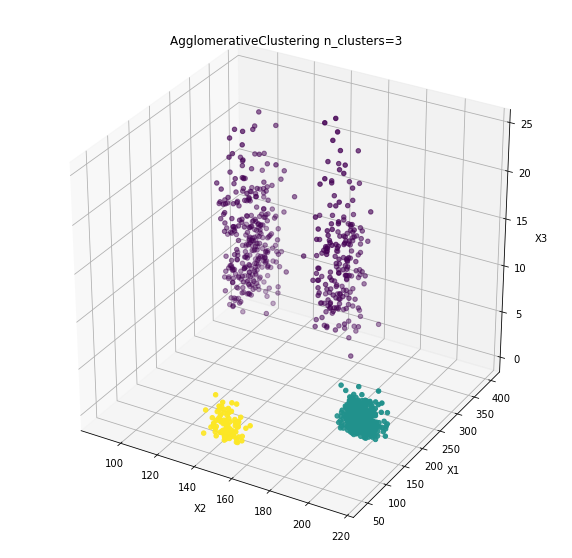

In [10]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(tab.X2,tab.X1,tab.X3,c=AgglomerativeClustering(n_clusters=3).fit_predict(tab))
ax.set_xlabel('X2')
ax.set_ylabel('X1')
ax.set_zlabel('X3')
ax.set_title('AgglomerativeClustering n_clusters=3')
plt.show(fig)

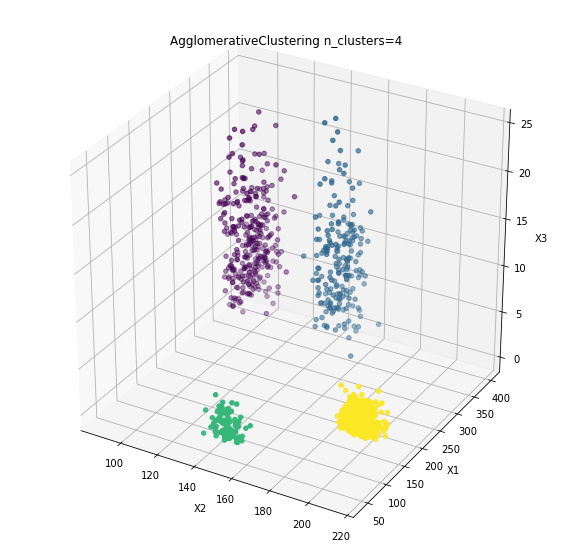

In [11]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(tab.X2,tab.X1,tab.X3,c=AgglomerativeClustering(n_clusters=4).fit_predict(tab))
ax.set_xlabel('X2')
ax.set_ylabel('X1')
ax.set_zlabel('X3')
ax.set_title('AgglomerativeClustering n_clusters=4')
plt.show(fig)

## Podsumowanie

Zarówno algorytm KMeans, jak i AgglomerativeClustering bardzo dobrze poradził sobie przy klasteryzacji zbioru na wskazaną przez metryki ilośc grup. Jednak przy intuicyjnej liczbie klastrów (zakładam, że właśnie taki podział jest domyślny) lepszy okazał się algorytm AgglomerativeClustering.